In [33]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import json
import zipfile
import seaborn as sns
import tensorflow as tf

from PIL import Image
from tensorflow.keras import  layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [7]:
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

importing data from kaggle

In [10]:
!pip install kaggle

In [18]:
kaggle_credentails=json.load(open("kaggle.json"))

In [19]:


# تأكد أن هذه الخلية قد تم تشغيلها بنجاح
kaggle_credentails = json.load(open("kaggle.json"))

os.environ['KAGGLE_USERNAME'] = kaggle_credentails['username']
os.environ['KAGGLE_KEY'] = kaggle_credentails['key']

In [20]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.03G/2.04G [00:25<00:00, 23.1MB/s]
100% 2.04G/2.04G [00:25<00:00, 84.3MB/s]


# New Section

In [21]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [22]:
zip_file_name = 'plantvillage-dataset.zip'

# افتح ملف الـ zip في وضع القراءة 'r'
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    # قم بفك ضغط جميع الملفات في المجلد الحالي
    zip_ref.extractall()

print(f"تم فك ضغط {zip_file_name} بنجاح!")

تم فك ضغط plantvillage-dataset.zip بنجاح!


In [31]:
import os #
print(os.listdir('plantvillage dataset'))
print()

print(len(os.listdir('plantvillage dataset/segmented')))

print(os.listdir('plantvillage dataset/segmented')[:5])
print()



['grayscale', 'color', 'segmented']

38
['Tomato___Leaf_Mold', 'Grape___Esca_(Black_Measles)', 'Tomato___healthy', 'Tomato___Early_blight', 'Tomato___Target_Spot']



In [32]:
print(os.listdir('plantvillage dataset/color/Grape___healthy'))
print(len(os.listdir('plantvillage dataset/color/Grape___healthy')))

['e949f6bb-cda7-4824-9a97-67337fc164a5___Mt.N.V_HL 6156.JPG', '3c593da4-e1df-460c-98a9-2bc71df670d5___Mt.N.V_HL 8970.JPG', '76590bd4-69ac-4f67-86ad-5056422d4ef8___Mt.N.V_HL 6193.JPG', 'cf6e5a18-8ae4-4525-8f35-bebe64820283___Mt.N.V_HL 9122.JPG', 'cd71e97d-cc73-4fdd-b625-c735844c3ce7___Mt.N.V_HL 6185.JPG', '72cd93bf-63f6-476a-b3ae-43af2006c9f2___Mt.N.V_HL 6132.JPG', '9e6f4d5f-c44a-40f0-bfbc-dcf0ef5f1371___Mt.N.V_HL 8940.JPG', 'aee361f6-d591-4c9f-9c66-a16c22523f8a___Mt.N.V_HL 9107.JPG', 'd7630b13-7701-436c-82c4-0a9a8248d6ee___Mt.N.V_HL 6187.JPG', 'b6c49725-ccb9-46a9-abca-c99f51e13d0a___Mt.N.V_HL 6026.JPG', 'ca090e78-ff31-4715-82eb-b63e20b0e156___Mt.N.V_HL 9081.JPG', '51665d49-a91d-4790-a705-425d3bd9e62a___Mt.N.V_HL 6172.JPG', 'c197dfe9-44d6-4a7e-bb5a-75e2bf05380b___Mt.N.V_HL 6100.JPG', '9155a721-9e2c-4b58-99be-eba41f454525___Mt.N.V_HL 6053.JPG', '5b2c9b7e-4f3a-4850-bd70-35230df9c794___Mt.N.V_HL 8933.JPG', '43256f66-6c1c-41f7-9505-890ed9dbf4c2___Mt.N.V_HL 8980.JPG', 'c03ffb41-c3a8-437f-9ee

Data preprocessing

In [25]:
base_dir='plantvillage dataset/color'

(256, 256, 3)


<function matplotlib.pyplot.axis(arg: 'tuple[float, float, float, float] | bool | str | None' = None, /, *, emit: 'bool' = True, **kwargs) -> 'tuple[float, float, float, float]'>

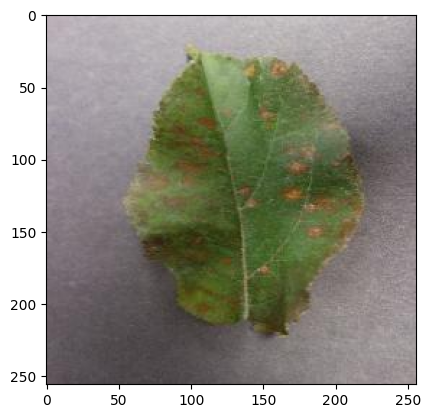

In [26]:
image_path='/content/plantvillage dataset/color/Apple___Cedar_apple_rust/0340baaa-e9cc-4c04-8f9b-c204180d9ae3___FREC_C.Rust 3805.JPG'
img=mpimg.imread(image_path)
print(img.shape)
plt.imshow(img)

plt.axis

image parameters

In [27]:
img_size=224
batch_size=32



In [28]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [29]:
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [30]:
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


# CNN

In [36]:

num_classes = train_generator.num_classes



model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))


model.add(Dense(num_classes, activation='softmax'))

print("---Done model ---")

---Done ---


In [37]:

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("---Done compile---")

---Done compile---


In [38]:

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,173,862 (42.62 MB)

 Trainable params: 11,173,862 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:

epochs = 20

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

print("\n--- Training completed successfully! ---")

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 105s 71ms/step - accuracy: 0.3697 - loss: 2.3930 - val_accuracy: 0.7452 - val_loss: 0.8324
Epoch 2/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 94s 69ms/step - accuracy: 0.6789 - loss: 1.0690 - val_accuracy: 0.8435 - val_loss: 0.5147
Epoch 3/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 93s 69ms/step - accuracy: 0.7594 - loss: 0.7763 - val_accuracy: 0.8816 - val_loss: 0.3712
Epoch 4/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 148s 73ms/step - accuracy: 0.8045 - loss: 0.6176 - val_accuracy: 0.8908 - val_loss: 0.3374
Epoch 5/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 100s 74ms/step - accuracy: 0.8327 - loss: 0.5264 - val_accuracy: 0.8840 - val_loss: 0.3521
Epoch 6/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 92s 68ms/step - accuracy: 0.8554 - loss: 0.4415 - val_accuracy: 0.9041 - val_loss: 0.2955
Epoch 7/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 93s 69ms/step - accuracy: 0.8728 - loss: 0.3853 - val_accuracy: 0.9117 - val_loss: 0.2717
Epoch 8/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 97s 71ms/step - accuracy: 0.8882 - loss: 0

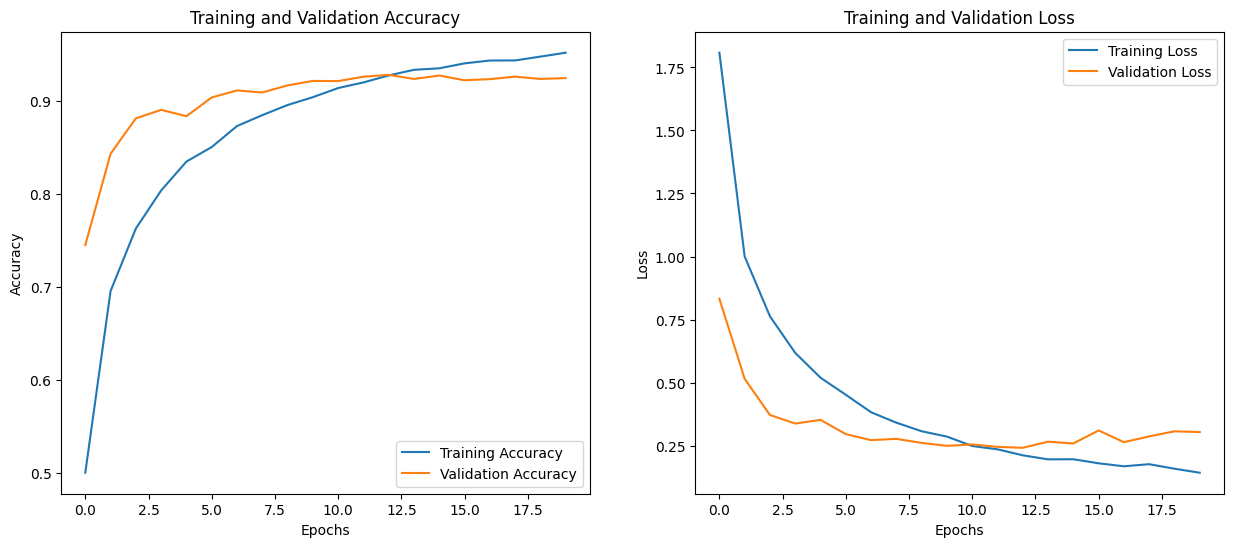

In [41]:
import matplotlib.pyplot as plt

# --- 1. Get the data from the history object ---
# We stored the results of model.fit() in 'history'
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs we ran
epochs_range = range(epochs) # 'epochs' variable from the training cell

# --- 2. Create the plots ---
# Create a figure with two subplots (one for accuracy, one for loss)
plt.figure(figsize=(15, 6))

# Subplot 1: Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Subplot 2: Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Show the plots
plt.show()

In [42]:
# Evaluate the model on the validation data

print("Evaluating the model on the validation dataset...")
scores = model.evaluate(validation_generator)

print("\n--- Final Model Evaluation ---")
# scores[0] is the loss, scores[1] is the accuracy
print(f"Final Validation Loss: {scores[0]:.4f}")
print(f"Final Validation Accuracy: {scores[1] * 100:.2f}%")

Evaluating the model on the validation dataset...
340/340 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - accuracy: 0.9262 - loss: 0.2863

--- Final Model Evaluation ---
Final Validation Loss: 0.3038
Final Validation Accuracy: 92.50%


In [43]:
# Save the entire model to a single file.
# The '.keras' format is the modern, recommended format.
model.save('plant_disease_classifier.keras')

print("Model has been saved successfully as 'plant_disease_classifier.keras'")

Model has been saved successfully as 'plant_disease_classifier.keras'


In [44]:
import numpy as np
from tensorflow.keras.preprocessing import image
# Make sure you have 'img_size' variable from before (it was 224)
# from tensorflow.keras.models import load_model # Optional: if you restarted

# --- 1. Get the list of class names ---
# The generator stores the class names in a dictionary.
# We need to get them so we can map the model's output (a number)
# back to a name (like 'Grape_healthy').
class_names = list(train_generator.class_indices.keys())
print(f"Loaded {len(class_names)} class names: {class_names[:5]}...") # Print first 5


# --- 2. Define the Prediction Function ---
def predict_image(image_path, model_to_use):
    """
    Loads, preprocesses, and predicts a single image.
    """
    try:
        # 2a. Load the image from the file path
        # target_size must be the same as in training (img_size, img_size)
        img = image.load_img(image_path, target_size=(img_size, img_size))

        # 2b. Convert the image to a numpy array
        img_array = image.img_to_array(img)

        # 2c. Rescale the image (CRITICAL: must be same as training)
        img_array_rescaled = img_array / 255.0

        # 2d. Expand dimensions to create a "batch" of 1
        # The model expects (batch_size, height, width, channels)
        # So we change (224, 224, 3) -> (1, 224, 224, 3)
        img_batch = np.expand_dims(img_array_rescaled, axis=0)

        # 2e. Make the prediction
        predictions = model_to_use.predict(img_batch)

        # 2f. Interpret the results
        # 'predictions' is an array of probabilities for all 38 classes

        # Find the index (position) of the highest probability
        predicted_index = np.argmax(predictions[0])

        # Get the class name using that index
        predicted_class_name = class_names[predicted_index]

        # Get the confidence score (the highest probability)
        confidence = np.max(predictions[0]) * 100

        # 2g. Print the results
        print(f"--- Prediction Results for: {image_path} ---")
        print(f"Predicted Class: {predicted_class_name}")
        print(f"Confidence: {confidence:.2f}%")

    except Exception as e:
        print(f"Error processing image {image_path}: {e}")


# --- 3. How to Use the Function ---

# 3a. First, upload a test image to Colab
#      Run this cell, click "Choose Files", and upload an image
from google.colab import files
print("Please upload a test image:")
uploaded = files.upload()

# 3b. Get the name of the file you just uploaded
# (This assumes you uploaded only one file)
if len(uploaded.keys()) > 0:
    test_image_path = list(uploaded.keys())[0]

    # 3c. Call the prediction function!
    # We use 'model' (the one already in memory)
    predict_image(test_image_path, model)
else:
    print("No file uploaded.")

Loaded 38 class names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']...
Please upload a test image:


No file uploaded.


In [46]:
from google.colab import drive


drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:

save_path = '/content/drive/My Drive/plant_disease_classifier.keras'

# Save the model
print(f"Saving model to: {save_path}")
model.save(save_path)

print("Model saved successfully to Google Drive!")

Saving model to: /content/drive/My Drive/plant_disease_classifier.keras
Model saved successfully to Google Drive!


In [49]:

!ls -lh "/content/drive/My Drive/plant_disease_classifier.keras"

-rw------- 1 root root 128M Oct 28 13:23 '/content/drive/My Drive/plant_disease_classifier.keras'


In [45]:
# --- Must be installed: pip install Flask tensorflow ---
from flask import Flask, request, render_template, redirect, url_for
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os # For handling file paths

# --- 1. Basic Setup ---
app = Flask(__name__) # Create the web app

# --- 2. Load Your Model (Do this ONCE at startup) ---
# Make sure the .keras file is in the same directory
MODEL_PATH = 'plant_disease_classifier.keras'
model = tf.keras.models.load_model(MODEL_PATH)
print("Model loaded successfully!")

# --- 3. Load Your Class Names ---
# You MUST get this list from your 'train_generator.class_indices'
# It's best to save this as a .json or .txt file, but
# for this example, I'll hardcode a few.
# (Replace this with your 38 class names)
CLASS_NAMES = [
    'Apple___Apple_scab',
    'Apple___Black_rot',
    'Apple___Cedar_apple_rust',
    'Apple___healthy',
    # ... (all 38 classes) ...
    ]

IMG_SIZE = 224 # Must be the same as in training

# --- 4. Define the Prediction Function ---
def process_and_predict(image_path):
    # This is the exact same logic from your notebook
    try:
        img = image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = image.img_to_array(img)
        img_array_rescaled = img_array / 255.0
        img_batch = np.expand_dims(img_array_rescaled, axis=0)

        predictions = model.predict(img_batch)

        predicted_index = np.argmax(predictions[0])
        predicted_class = CLASS_NAMES[predicted_index]
        confidence = np.max(predictions[0]) * 100

        return predicted_class, confidence
    except Exception as e:
        print(f"Error in prediction: {e}")
        return None, None

# --- 5. Define Website Routes (Pages) ---

# This route shows the main page (the upload form)
@app.route('/', methods=['GET'])
def index():
    # Renders the 'index.html' file
    return render_template('index.html')

# This route handles the image upload and prediction
@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        # Get the file from the POST request
        file = request.files['image']
        if file:
            # Save the file to a temporary path
            # (Create an 'uploads' folder first)
            upload_folder = 'uploads'
            if not os.path.exists(upload_folder):
                os.makedirs(upload_folder)

            file_path = os.path.join(upload_folder, file.filename)
            file.save(file_path)

            # Get prediction
            class_name, confidence = process_and_predict(file_path)

            # Pass the result to the HTML
            return render_template('index.html',
                                   prediction_text=f'Prediction: {class_name}',
                                   confidence_text=f'Confidence: {confidence:.2f}%',
                                   img_path=file_path)
    # If no file, just go back to the index
    return redirect(url_for('index'))


# --- 6. Run the App ---
if __name__ == '__main__':
    # Start the web server
    app.run(debug=True)

Model loaded successfully!
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)
